In [ ]:
import scipy.stats as ss
import numpy as np
import ot 
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


## Wasserstein Distance Between Similar Empirical Distributions, order = 1



In [ ]:

# Set seed for reproducibility
rng = np.random.default_rng(46)

# Generate random empirical measures with N=100 samples in 8 dimensions
N = 100
dim = 8
samples = rng.uniform(0, 100, (N,dim))  # Generate samples from standard normal distribution

# Create two distributions by duplicating the samples
dist_1 = samples.copy()
dist_2 = samples.copy()

# Remove a random sample from dist_1
idx1 = np.random.randint(0, N)
dist_1 = np.delete(dist_1, idx1, axis=0)

# Remove a different random sample from dist_2
idx2 = idx1
while idx2 == idx1:
    idx2 = np.random.randint(0, N)
dist_2 = np.delete(dist_2, idx2, axis=0)

print(f"Removed sample index {idx1} from dist_1")
print(f"Removed sample index {idx2} from dist_2")
print(f"Shape of dist_1: {dist_1.shape}")
print(f"Shape of dist_2: {dist_2.shape}")

# Calculate Wasserstein distance between the distributions
# Note: scipy.stats.wasserstein_distance works on 1D arrays,
# so we calculate it separately for each dimension

wd = stats.wasserstein_distance_nd(dist_1, dist_2)

print(f"Wasserstein distance between dist_1 and dist_2: {wd:.6f}")

wd_approx = np.linalg.norm(samples[idx1] - samples[idx2], ord=2 )/(N-1)
print(f"Wasserstein distance approximation: {wd_approx:.6f}")

Removed sample index 40 from dist_1
Removed sample index 58 from dist_2
Shape of dist_1: (99, 8)
Shape of dist_2: (99, 8)
Wasserstein distance between dist_1 and dist_2: 1.247611
Wasserstein distance approximation: 1.247611


## Order $\geq$ 1

In [76]:
# Generate random empirical measures with N=100 samples in 8 dimensions
N = 100
dim = 8
samples = rng.uniform(0, 100, (N,dim))  # Generate samples from standard normal distribution

# Create two distributions by duplicating the samples
dist_1 = samples.copy()
dist_2 = samples.copy()

# Remove a random sample from dist_1
idx1 = np.random.randint(0, N)
dist_1 = np.delete(dist_1, idx1, axis=0)

# Remove a different random sample from dist_2
idx2 = idx1
while idx2 == idx1:
    idx2 = np.random.randint(0, N)
dist_2 = np.delete(dist_2, idx2, axis=0)

print(f"Removed sample index {idx1} from dist_1")
print(f"Removed sample index {idx2} from dist_2")
print(f"Shape of dist_1: {dist_1.shape}")
print(f"Shape of dist_2: {dist_2.shape}")

# Calculate Wasserstein distance between the distributions
# Note: scipy.stats.wasserstein_distance works on 1D arrays,
# so we calculate it separately for each dimension
wd_list = []
wd_approx_list = []
p_values = np.arange(1,40,1)
for p in p_values:
    M = (ot.dist(dist_1, dist_2, metric = 'euclidean', p = p))**p
    wd = (np.sum(ot.emd2(a=[], b=[], M=M, numThreads='max')))**(1/p)
    wd_approx = np.linalg.norm(samples[idx1] - samples[idx2], ord=2 )/((N-1)**(1/p))
    print("----------------------------------------------------")
    print(f"Order={p}:")
    print(f"Wasserstein distance (OT library): {wd}")
    print(f"Wasserstein distance approximation: {wd_approx}")
    wd_list.append(wd)
    wd_approx_list.append(wd_approx)



Removed sample index 82 from dist_1
Removed sample index 99 from dist_2
Shape of dist_1: (99, 8)
Shape of dist_2: (99, 8)
----------------------------------------------------
Order=1:
Wasserstein distance (OT library): 1.3934786699519293
Wasserstein distance approximation: 1.3934780652881895
----------------------------------------------------
Order=2:
Wasserstein distance (OT library): 11.962375295453276
Wasserstein distance approximation: 13.86493168845387
----------------------------------------------------
Order=3:
Wasserstein distance (OT library): 21.59573611220121
Wasserstein distance approximation: 29.8210959400033
----------------------------------------------------
Order=4:
Wasserstein distance (OT library): 28.23944713909864
Wasserstein distance approximation: 43.73473836978314
----------------------------------------------------
Order=5:
Wasserstein distance (OT library): 32.83781517152747
Wasserstein distance approximation: 55.03111250425809
-------------------------------

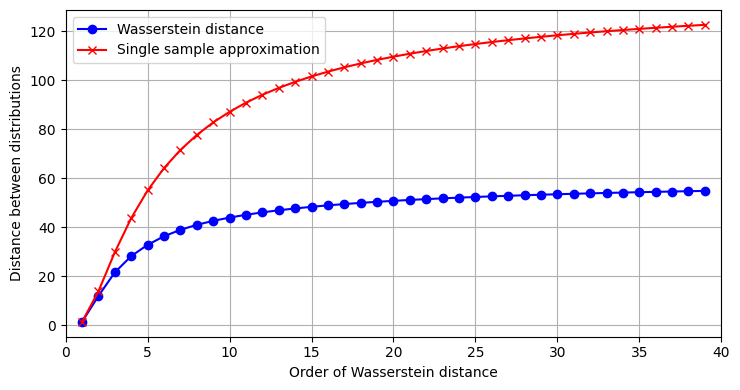

In [87]:
plt.figure(figsize=(7.5, 4))
plt.plot(p_values, wd_list, label='Wasserstein distance', marker='o', color='blue')
plt.plot(p_values, wd_approx_list, label='Single sample approximation', marker='x', color='red')
plt.xlabel('Order of Wasserstein distance')
plt.ylabel('Distance between distributions')
plt.legend()
plt.grid()
plt.xlim(0, p_values[-1]+1)
plt.tight_layout()
plt.savefig('test_wasserstein_exactness.pdf', dpi=400)
plt.show()
